
# Multiple Linear Regression – 3D Visualization & Evaluation

This notebook explains **Multiple Linear Regression** intuitively using:

1. Mathematical formulation
2. 3D visualization of data points
3. Regression plane visualization
4. Model training & prediction
5. Evaluation metrics with explanations

We use **2 independent variables** so the regression can be visualized as a **3D plane**.



## 1. Import Required Libraries


In [31]:

import numpy as np
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



## 2. Create Dataset

### True underlying equation:

\[
y = 2x_1 + 3x_2 + 5
\]


In [14]:
np.random.seed(42)

n_samples = 200

X1 = np.random.uniform(1, 10, n_samples)
X2 = np.random.uniform(1, 10, n_samples)

noise = np.random.normal(loc=0, scale=3, size=n_samples)

y = 2*X1 + 3*X2 + 5 + noise

X = np.column_stack((X1, X2))




## 3. Visualize Raw Data in 3D


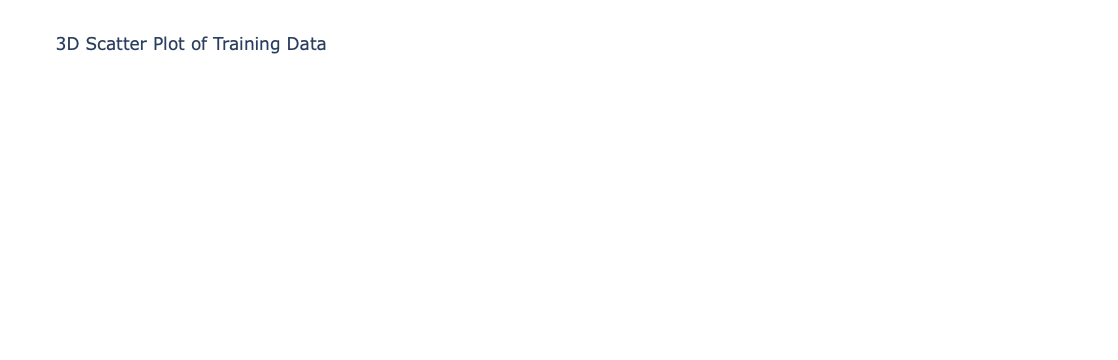

In [16]:

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=y,
    mode='markers',
    marker=dict(size=4),
    name='Data Points'
))

fig.update_layout(
    title="3D Scatter Plot of Training Data",
    scene=dict(
        xaxis_title="X1",
        yaxis_title="X2",
        zaxis_title="y"
    )
)

fig.show()



## 4. Multiple Linear Regression Model

### Mathematical Form:

\[
y = m_1x_1 + m_2x_2 + b
\]


In [18]:

model = LinearRegression()
model.fit(X, y)

m1, m2 = model.coef_
b = model.intercept_

print("Slope m1:", m1)
print("Slope m2:", m2)
print("Intercept b:", b)


Slope m1: 2.003273367068691
Slope m2: 2.9398962783719487
Intercept b: 5.3028760877379355


In [27]:
x1_range = np.linspace(X[:,0].min(), X[:,0].max(), 20)
x2_range = np.linspace(X[:,1].min(), X[:,1].max(), 20)

X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)

grid_points = np.column_stack((
    X1_grid.ravel(),
    X2_grid.ravel()
))

y_plane = model.predict(grid_points)



## 5. Visualize Regression Plane with Data


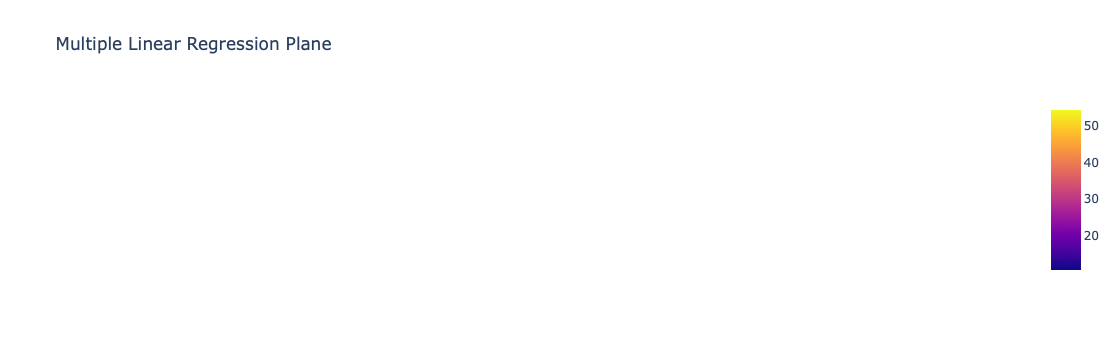

In [29]:
fig = go.Figure()

# Actual data
fig.add_trace(go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=y,
    mode='markers',
    marker=dict(size=3),
    name='Actual Data'
))

# Regression plane
fig.add_trace(go.Surface(
    x=X1_grid,
    y=X2_grid,
    z=y_plane.reshape(X1_grid.shape),
    opacity=0.6,
    name='Regression Plane'
))

fig.update_layout(
    title="Multiple Linear Regression Plane",
    scene=dict(
        xaxis_title="X1",
        yaxis_title="X2",
        zaxis_title="y"
    )
)

fig.show()



## 6. Evaluation Metrics


In [ ]:

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

n = len(y)
p = X.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print("Adjusted R2:", adj_r2)



## 🎯 Final Understanding

- Multiple Linear Regression learns a **plane**
- Each feature has its own slope
- Metrics quantify goodness of fit
- Adjusted R² matters when features increase
